In [1]:
%load_ext autoreload
%autoreload 2

import functions.add_path

import functions.plotnine_theme
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from plotnine import *
from plotnine.data import *

import functions.et_condition_df as condition_df
import functions.et_make_df as  make_df
import be_load
import os
import functions.detect_saccades as saccades
print(os.getcwd())
if os.getcwd()[-4:] != 'code':
    try:
        os.chdir('./code')
    except:
        os.chdir('/net/store/nbp/users/behinger/projects/etcomp/code')

/home/student/b/behinger/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


/net/store/nbp/users/behinger/projects/etcomp/code


In [2]:
(etsamples,etmsgs,etevents) = be_load.load_data(algorithm='')

warning subject backup et el not found
warning subject backup et pl not found
warning subject results et el not found
warning subject results et pl not found
warning subject compress_videos.sh et el not found
warning subject compress_videos.sh et pl not found
warning subject conversion.log et el not found
warning subject conversion.log et pl not found


File b'/net/store/nbp/projects/etcomp/backup/preprocessed/el_cleaned_samples.csv' does not exist
File b'/net/store/nbp/projects/etcomp/backup/preprocessed/pl_cleaned_samples.csv' does not exist
File b'/net/store/nbp/projects/etcomp/results/preprocessed/el_cleaned_samples.csv' does not exist
File b'/net/store/nbp/projects/etcomp/results/preprocessed/pl_cleaned_samples.csv' does not exist
File b'/net/store/nbp/projects/etcomp/compress_videos.sh/preprocessed/el_cleaned_samples.csv' does not exist
File b'/net/store/nbp/projects/etcomp/compress_videos.sh/preprocessed/pl_cleaned_samples.csv' does not exist
File b'/net/store/nbp/projects/etcomp/conversion.log/preprocessed/el_cleaned_samples.csv' does not exist
File b'/net/store/nbp/projects/etcomp/conversion.log/preprocessed/pl_cleaned_samples.csv' does not exist
slope:1.0001080144, intercept:0.0154277443
slope:1.0001091380, intercept:0.0007877272
slope:1.0001095884, intercept:-0.0003106919
slope:1.0001095380, intercept:-0.0000707670
slope:1.

In [115]:
subject = 'VP25'
eyetracker = 'el'
block=1.0
print('block:%s,subject%s,eyetracker%s'%(block,subject,eyetracker))
query = 'subject==@subject&eyetracker==@eyetracker'

# select the start / end triggers of the microsaccade blocks

sel_etmsgs = etmsgs.query(query+ "&block==@block&condition=='MICROSACC'&exp_event=='start'")
starttime = etmsgs.query(query+"&block==@block&condition=='MICROSACC'&exp_event=='start'").msg_time.values
endtime = etmsgs.query(query+"&block==@block&condition=='MICROSACC'&exp_event=='stop'").msg_time.values

# find which samples belong into that timeframe
sel_etsamples = etsamples.query(query)
#is_microsaccade = helper.eventtime_to_sampletime(sel_etsamples,starttime,endtime)

# set these to 1 so that we can select them
#sel_etsamples.loc[sel_etsamples.index[is_microsaccade],'microsaccade'] = 1
# overwrite the previous detected types, so that we can fill in the microsaccade types
#sel_etsamples.loc[:,'type'] = np.nan

#sel_etsamples = sel_etsamples.query("microsaccade==1")
sel_etsamples = sel_etsamples.query("smpl_time>@starttime&smpl_time<@endtime")
engbert_lambda  = 5

In [117]:
sel_etsamples

,pa,gx,smpl_time,gy,gy_vel,gx_vel,confidence,type,outside,zero_pa,neg_time,blink_id,algorithm,eyetracker,subject
22894424,456.0,-0.151547,568.541,0.237203,-1.274809,-1.284615,NaN,fixation,False,False,False,0,,el,VP25
22894425,456.0,-0.158136,568.545,0.243792,-1.274809,-0.642308,NaN,fixation,False,False,False,0,,el,VP25
22894426,457.0,-0.158136,568.549,0.243792,-2.230916,0.000000,NaN,fixation,False,False,False,0,,el,VP25
22894427,457.0,-0.151547,568.553,0.250381,-4.461832,-0.321154,NaN,fixation,False,False,False,0,,el,VP25
22894428,458.0,-0.158136,568.557,0.276736,-6.374046,-1.605769,NaN,fixation,False,False,False,0,,el,VP25
22894429,458.0,-0.164725,568.561,0.303092,-6.055343,-2.569231,NaN,fixation,False,False,False,0,,el,VP25
22894430,458.0,-0.177903,568.565,0.322858,-3.824427,-2.569231,NaN,fixation,False,False,False,0,,el,VP25
22894431,458.0,-0.184492,568.569,0.329447,-0.637405,-2.248077,NaN,fixation,False,False,False,0,,el,VP25
22894432,459.0,-0.191081,568.573,0.329447,3.187023,-2.248077,NaN,fixation,False,False,False,0,,el,VP25
22894433,459.0,-0.197670,568.577,0.309681,7.011450,-3.532692,NaN,fixation,False,False,False,0,,el,VP25


In [116]:
from functions import detect_events as detect_events
# Run the microsaccade detection
sel_etsamples,sel_etevents = detect_events.make_saccades(sel_etsamples,etevents=None,et=eyetracker,engbert_lambda = engbert_lambda)
# fill in some details
sel_etevents = sel_etevents.assign(subject=subject)
sel_etevents = sel_etevents.assign(eyetracker=eyetracker)
sel_etevents = sel_etevents.assign(block=block)

# remove all saccades larger than amplitude of 2
sel_etevents = sel_etevents.query("amplitude<2")

Std of velocity data [0.0033 0.0099]
Mean overthreshold values: 0.0


AttributeError: 'list' object has no attribute 'shape'

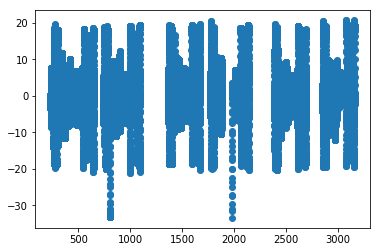

In [113]:
plt.plot(etsamples.query(query).smpl_time,etsamples.query(query).gx,'o')

In [108]:
sel_etevents

,amplitude,duration,end_gx,end_gy,end_time,peak_velocity,start_gx,start_gy,start_time,type,subject,eyetracker,block
0,0.0,0.0,0.0,0.0,435.797,0.0,0.0,0.0,435.797,saccade,VP23,el,1.0


In [104]:
sel_etevents

,duration,end_gx,end_gy,end_time,peak_velocity,start_gx,start_gy,start_time,amplitude,type,subject,eyetracker,block
0,0.020833,1.61917,-0.178961,2549.475,118.944321,1.573017,-0.098944,2549.454167,0.092346,saccade,VP4,pl,5.0


block:1.0,subjectVP1,eyetrackerel
[284.118]
[304.13]


In [118]:
import MICROSACC
microsacc_5 = MICROSACC.detect_microsaccades(etsamples=etsamples,etmsgs=etmsgs,etevents=etevents,engbert_lambda=5)

In [130]:
namelist = ['microsaccade']
datalist = [microsacc_5]
[dat.to_csv('/net/store/nbp/projects/etcomp/results/'+name+'.csv') for dat,name in zip(datalist,namelist)]

[None]

In [ ]:
sample_rate = 240

In [5]:
import functions.detect_events as detect_events
import functions.et_helper as helper

In [52]:
#for subject in XXX
#for et in ['el','pl']
subject ='VP1'
eyetracker = 'el'
query = 'subject==@subject&eyetracker==@eyetracker'

In [74]:
sel_etmsgs = etmsgs.query(query+ "&condition=='MICROSACC'&exp_event=='start'")

starttime = etmsgs.query(query+"&condition=='MICROSACC'&exp_event=='start'").msg_time
endtime = etmsgs.query(query+"&condition=='MICROSACC'&exp_event=='stop'").msg_time


sel_etsamples = etsamples.query(query)

is_microsaccade = helper.eventtime_to_sampletime(sel_etsamples,starttime,endtime)

sel_etsamples.loc[sel_etsamples.index[is_microsaccade],'microsaccade'] = 1
sel_etsamples.loc[:,'type'] = np.nan

sel_etsamples = sel_etsamples.query("microsaccade==1")

/net/store/nbp/users/behinger/projects/etcomp/code/functions/et_helper.py:126: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  eventstart.loc[eventstart < mintime] = mintime
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/net/store/nbp/users/behinger/projects/etcomp/code/functions/et_helper.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-vie

In [75]:
sel_etsamples,saccadeevents = detect_events.make_saccades(sel_etsamples,etevents=None,et=eyetracker)
saccadeevents = saccadeevents.assign(subject=subject)
saccadeevents = saccadeevents.assign(eyetracker=eyetracker)

In [111]:
saccadeevents = saccadeevents.query("amplitude<2")

In [113]:
microsaccade = condition_df.get_condition_df(data=(sel_etsamples,sel_etmsgs,saccadeevents),condition="MICROSACC")

CRITICAL:functions.et_condition_df:Eyetracker: el    Subject: VP1 


In [103]:
microsaccade.iloc[0:1]

,duration,end_gx,end_gy,end_time,peak_velocity,start_gx,start_gy,start_time,amplitude,type,angle,block,condition,element,exp_event,grid_size,lum,msg_time,pic_id,posx,posy,shake_x,shake_y,trial,vel,algorithm,beep,et,eyetracker,subject
0,0.008,0.382161,0.013178,285.033,67.194529,-0.039534,-0.13178,285.025,0.421695,saccade,NaN,1.0,MICROSACC,NaN,start,NaN,NaN,284.118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,hmm,NaN,EyeLink,el,VP1


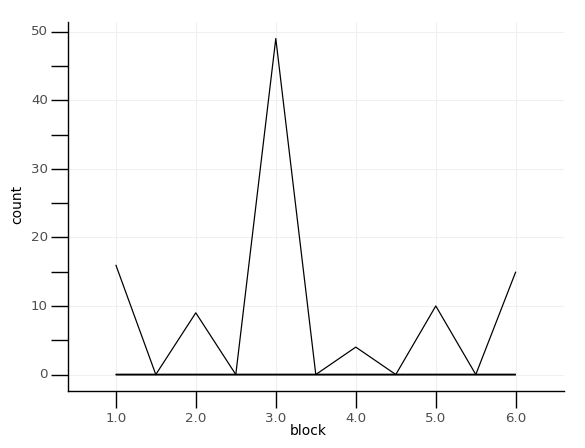

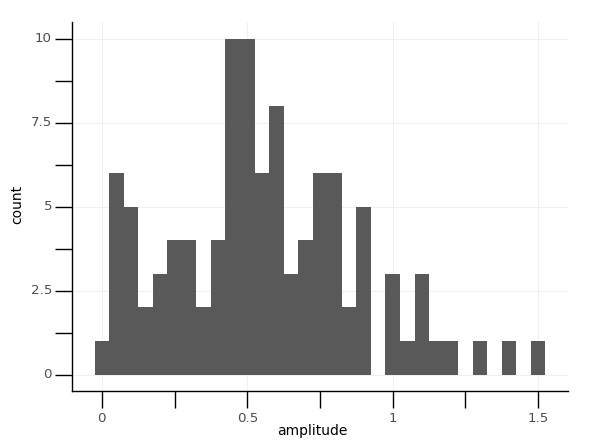

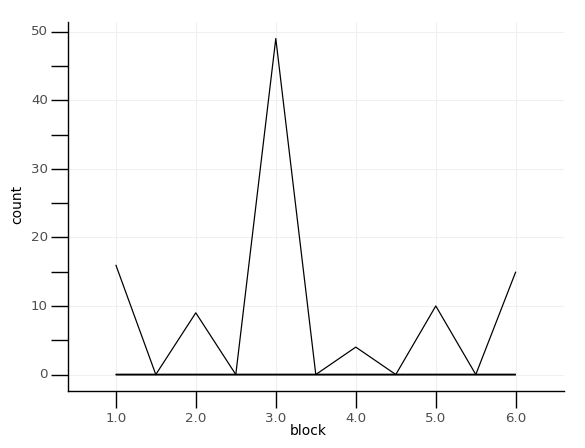

In [121]:
(ggplot(microsaccade,aes(x="amplitude"))+geom_histogram(binwidth=0.05)).draw()
(ggplot(microsaccade,aes(x="block",y="..count.."))+geom_line(stat="bin",binwidth=0.5)).draw()


In [147]:
sel_etsamples = helper.add_events_to_samples(sel_etsamples,saccadeevents)

In [149]:
sel_etsamples.type = sel_etsamples.type.astype(str)

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


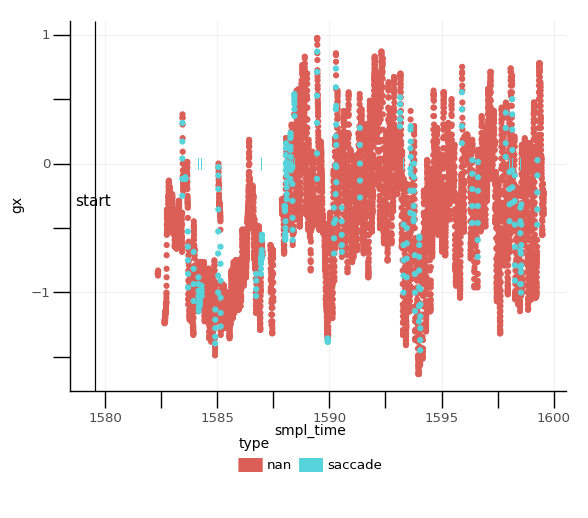

<ggplot: (-9223363309061479999)>

In [154]:
helper.plot_around_event(sel_etsamples,sel_etmsgs,saccadeevents,sel_etmsgs.iloc[2],plusminus=(0,20))

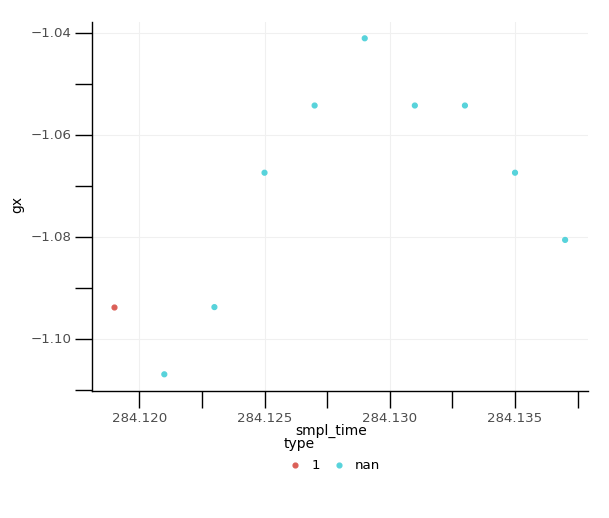

<ggplot: (8727793269077)>

In [151]:
ggplot()+ geom_point(aes(x='smpl_time',y='gx',color='type'),data=sel_etsamples.iloc[0:10]) # samples

In [2]:
microsaccade = pd.read_csv('/net/store/nbp/projects/etcomp/results/microsaccade.csv')

In [8]:
microsaccade.head()

,Unnamed: 0,amplitude,block,duration,end_gx,end_gy,end_time,eyetracker,peak_velocity,start_gx,start_gy,start_time,subject,type
0,0,0.283403,1.0,0.010,0.250381,0.019767,285.033,el,33.597265,-0.019767,-0.065890,285.023,VP1,saccade
1,1,0.507732,1.0,0.014,-0.105424,0.158136,286.083,el,49.527287,0.401923,0.177903,286.069,VP1,saccade
2,2,0.224894,1.0,0.008,0.309681,0.184492,286.097,el,29.832792,0.085657,0.204259,286.089,VP1,saccade
3,3,0.373713,1.0,0.010,0.408512,0.105424,286.365,el,43.953194,0.039534,0.164725,286.355,VP1,saccade
4,4,0.715998,1.0,0.016,-0.085657,0.303092,290.425,el,63.967102,0.606167,0.487575,290.409,VP1,saccade


In [3]:
dfmatch = pd.DataFrame()
for sub in microsaccade.subject.unique():
    print(sub)
    ms_sub = microsaccade.query("subject==@sub")
    for block in ms_sub.block.unique():
        
        ms_block = ms_sub.query("block==@block")
        ms_pl = ms_block.query("eyetracker=='pl'")
        ms_et = ms_block.query("eyetracker=='el'")
        for el_ix,ms_el in ms_et.iterrows():

            # EL |------| 
            # PL |------|
            #
            # This is a special case a special case and so unlikely I will not treat it specially
            # 5 possibilities:
            # EL |------|
            # PL     |----|
            # 
            # EL     |-----|
            # PL |----|
            #
            # EL |---|
            # PL       |---|
            #
            # EL       |---|
            # PL |--|
            #
            # EL |------------|
            # PL      |---|    
            #
            # EL      |---|
            # PL   |---------|
            #

            # 1

            overlap_1 =  (ms_pl.start_time> ms_el.start_time) & (ms_pl.start_time < ms_el.end_time) & (ms_pl.end_time >ms_el.end_time)
            overlap_2 =  (ms_pl.start_time< ms_el.start_time) & (ms_pl.end_time >ms_el.start_time) & (ms_pl.end_time <ms_el.end_time )

            overlap = overlap_1|overlap_2

            #3 | 4
            # these are uninteresting to us, we will mark them later
            outside = (ms_pl.start_time< ms_el.end_time) | (ms_pl.end_time< ms_el.start_time)

            #5 PL Within EL
            within_el = (ms_pl.start_time> ms_el.start_time) & (ms_pl.end_time <ms_el.end_time)

            #6 EL Within PL
            within_pl = (ms_pl.start_time< ms_el.start_time) & (ms_pl.end_time >ms_el.end_time)

            def posToAngle(x,y,x2,y2):
                angle = np.arctan2(y2-y,x2-x)
                return(angle)


            def add(dfmatch,el_ix,ms_toaddAll,typename):
                #print(typename,ms_toaddAll.shape)
                for pl_ix,ms_toadd in ms_toaddAll.iterrows():
                    dfmatch =dfmatch.append({"angle_el":posToAngle(ms_el.start_gx,ms_el.start_gy,ms_el.end_gx,ms_el.end_gy),"amplitude_el":ms_el.amplitude,
                                     "angle_pl":posToAngle(ms_toadd.start_gx,ms_toadd.start_gy,ms_toadd.end_gx,ms_toadd.end_gy),"amplitude_pl":ms_toadd.amplitude,
                                    "subject":sub,"block":block,"type":typename,"el_ix":el_ix,"pl_ix":pl_ix},ignore_index=True)
                return(dfmatch)

            if np.sum(overlap)>0:
                dfmatch = add(dfmatch,el_ix,ms_pl.loc[overlap],"overlap")
            if np.sum(within_el)>0:
                dfmatch = add(dfmatch,el_ix,ms_pl.loc[within_el],"within_el")
            if np.sum(within_pl)>0:
                dfmatch = add(dfmatch,el_ix,ms_pl.loc[within_pl],"within_pl")

VP1
VP2
VP3
VP4
VP11
VP12
VP14
VP15
VP19
VP20
VP22
VP23
VP24
VP25
VP26


In [4]:
dfmatch.head()

 
microsaccade.loc[:,"angle"] = posToAngle(microsaccade.start_gx,microsaccade.start_gy,microsaccade.end_gx,microsaccade.end_gy)
allmatch_el = microsaccade.query("eyetracker=='el'")
allmatch_pl = microsaccade.query("eyetracker=='pl'")

allmatch_el.loc[:,"amplitude_el"] = allmatch_el.loc[:,'amplitude']
allmatch_el.loc[:,"amplitude_pl"] = -.1
allmatch_el.loc[:,"angle_el"] = allmatch_el.loc[:,'angle']
allmatch_el.loc[:,"angle_pl"] = -.1 - np.pi


allmatch_pl.loc[:,"amplitude_pl"] = allmatch_pl.loc[:,'amplitude']
allmatch_pl.loc[:,"amplitude_el"] = -.1
allmatch_pl.loc[:,"angle_pl"] = allmatch_pl.loc[:,'angle']
allmatch_pl.loc[:,"angle_el"] = -.1 - np.pi

allmatch_el = allmatch_el.drop(dfmatch.el_ix)
allmatch_pl = allmatch_pl.drop(dfmatch.pl_ix)

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [5]:
print(allmatch_el.shape)
print(allmatch_pl.shape)
print(dfmatch.el_ix.unique().shape)
print(dfmatch.pl_ix.unique().shape)

microsaccade.groupby("eyetracker").agg("count")

(1165, 19)
(504, 19)
(623,)
(601,)


,Unnamed: 0,amplitude,block,duration,end_gx,end_gy,end_time,peak_velocity,start_gx,start_gy,start_time,subject,type,angle
eyetracker,,,,,,,,,,,,,,
el,1788,1788,1788,1788,1788,1788,1788,1788,1788,1788,1788,1788,1788,1788
pl,1105,1105,1105,1105,1105,1105,1105,1105,1105,1105,1105,1105,1105,1105


Unnamed: 0       6.11
amplitude        6.11
duration         6.11
end_gx           6.11
end_gy           6.11
end_time         6.11
eyetracker       6.11
peak_velocity    6.11
start_gx         6.11
start_gy         6.11
start_time       6.11
angle            6.11
amplitude_pl     6.11
amplitude_el     6.11
angle_pl         6.11
angle_el         6.11
dtype: float64

In [109]:
allmatch = pd.concat([allmatch_el,allmatch_pl],join="outer")
allmatch.loc[:,"type"] = 'nomatch'
allall = pd.concat([allmatch,dfmatch],join="inner")

/net/store/nbp/users/behinger/projects/etcomp/local/etcompvenv/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


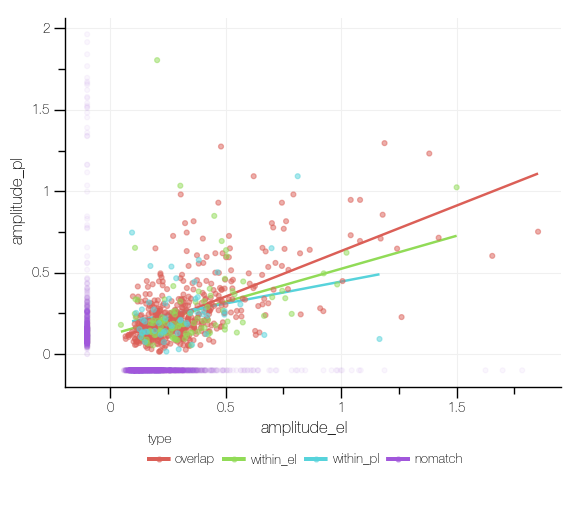

<ggplot: (-9223363260146818097)>

In [129]:
ggplot(dfmatch,aes(x="amplitude_el",y="amplitude_pl",color="type"))+stat_smooth(method="lm",se=False)+geom_point(alpha=0.5)+geom_point(allmatch,alpha=0.05)

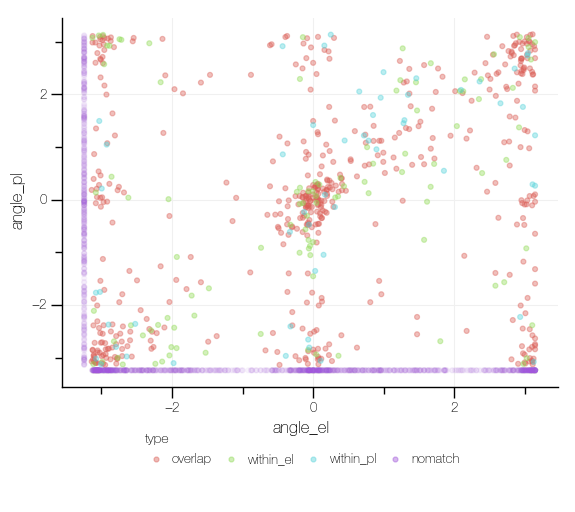

<ggplot: (8776708073136)>

In [116]:
ggplot(dfmatch,aes(x="angle_el",y="angle_pl",color="type")) + geom_point(alpha=0.4)+geom_point(allmatch,alpha=0.05,)

In [120]:
allall.groupby(["type"]).agg("count")

,amplitude_el,amplitude_pl,angle_el,angle_pl,block,subject
type,,,,,,
nomatch,1669,1669,1669,1669,1669,1669
overlap,513,513,513,513,513,513
within_el,106,106,106,106,106,106
within_pl,54,54,54,54,54,54


In [124]:
54/(1669+513+106+54)

0.02305721605465414